# Heart Disease Classification

This is another quick example of a classification project focusing on trying to build a predictor for heart disease given some readily available data. 

The data has been sourced from Kaggle and can be found here: 

More information can be found here: [Kaggle Link - Heart Disease Project](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

# Project Background 


Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. 

Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# Data Features

- Age (age in years)
- Sex (1 = male; 0 = female)
- CP (chest pain type)
- TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
- CHOL (serum cholestoral in mg/dl)
- FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- RESTECH (resting electrocardiographic results)
- THALACH (maximum heart rate achieved)
- EXANG (exercise induced angina (1 = yes; 0 = no))
- OLDPEAK (ST depression induced by exercise relative to rest)
- SLOPE (the slope of the peak exercise ST segment)
- CA (number of major vessels (0-3) colored by flourosopy)
- THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
- TARGET (1 or 0)

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
# Project Approach 

We will approach the project with the following steps: 
1. Exploratory Data Analysis
2. Feature Engineering
3. Feature Selection
4. Modelling
5. Project Outcome

# Project Outcome 

To make this project have a more well rounded outcome, we will say we want a model that is higher on recall than it is on precision. 

Why a higher recall than precision? Because we should be capturing more false negatives as heart disease is a really serious threat to someone's life, even if we are not as precise and have a lot of non heart disease cases, we can still capture those that slipped through the predicition net! 

If we only wanted a high precision, we could be missing out on some people - I think most would agree a higher recall is the way to go!

# Loading Packages and Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# load the data: 

df = pd.read_csv('data/heart.csv')

In [3]:
# view the first few rows: 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# last few rows: 
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# inspect some information about the data: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Immediately we have the following: 
- Every single column is numerical! 
- But this might be a bit of a misnomer - some of these columns could have ordinal values in them, which is why they are like this! 

In additiont here are **no missing values present - so we do not need to impute the data**

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


What can we see from the above summary of the numerical columns at a first glance? 

- **trestbps chol and thalach** might have some outliers or have a certain level of skewness amongst them! 
- There aren't really extreme values present in other columns, and some only seem to have only a few values to take - potentially nominal or ordinal variables like **cp**

# Splitting the Data into Test and Train 

Why are we splitting the data so early on before exploratory data analysis? 

We can explore further if we want to, but I don't want to encourage any form of data leakage in our final models for example seeing any patterns before hand and trying to select a model around this, as this may lead to data leakage! 

Although I will make the exception for class imbalance, so let's quickly look at that before splitting, and if it is a bit of a problem we will aim to solve it later on! 

In [8]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

It's a rouhgly even split between the two classes, so we can go ahead into splitting the data now

In [9]:
# set a random seed
np.random.seed(42)
# import splitting functions 
from sklearn.model_selection import train_test_split
# split the data: 
X = df.drop(['target'], axis = 1)
y = df['target']
# runa  0.30 test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
# check shape of the returned dataframes: 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((717, 13), (717,), (308, 13), (308,))

# Exploratory Data Analysis 

We'll start off with looking at univariate analysis, moving over to bivariate and then looking at correlations - not we are only working on the training data from now onwards!

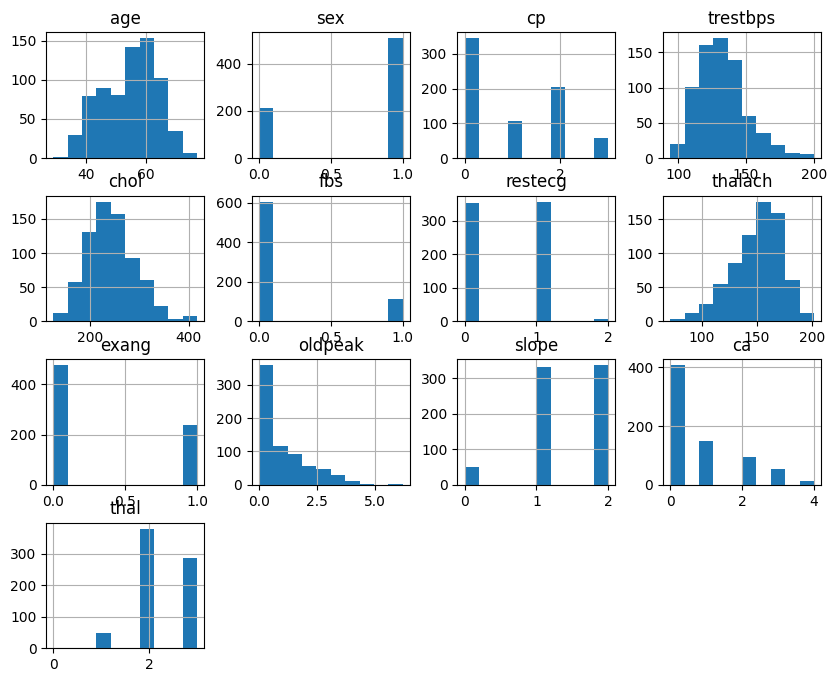

In [15]:
# check some plots of the numerical distributions a histogram should suffice
X_train.hist(sharex=False, sharey=False, 
       figsize=(10,8));

What can we see immediately from these distributions? 

1. Oldpeak - which is right skewed - meaning that the mean > median
2. thalach  - is more left skewed, we can see quite a large amount of values when approching values > 150, but this does drop off quite sharply
3. cp, thal, exang, sex, restecg, slope and ca are seemingly categorical values (some might be ordinal!) - also ca does have some right skewed data! 

We can transform some of these features int he next stage: *feature transformation*

# Univariate and Bivariate Analysis

A good question to ask is, is there a different between genders and chest pain? How is this represented visually and numerically?

In [17]:
X_train[['sex', 'cp']].value_counts()

sex  cp
1    0     260
     2     128
0    0      85
     2      77
1    1      70
     3      49
0    1      38
     3      10
dtype: int64

ConversionError: Failed to convert value(s) to axis units: ['male', 'female']

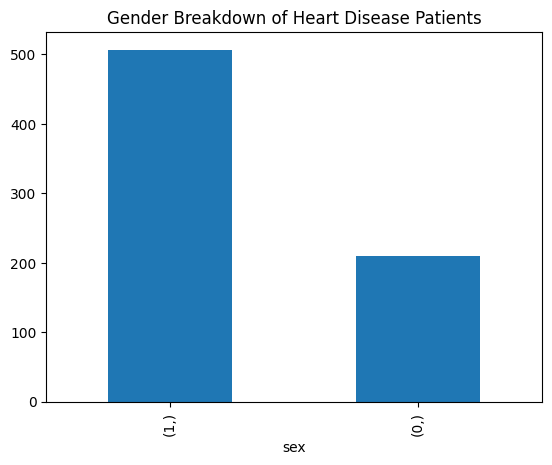

In [32]:
X_train[['sex']].value_counts().plot(kind = "bar")
plt.title("Gender Breakdown of Heart Disease Patients")
plt.xticks(ticks = ['male', 'female'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()